In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow-cpu
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 8.7 MB/s eta 0:00:00


In [ ]:
import torch
import transformers
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import torch.nn as nn

In [ ]:
from huggingface_hub import login

#Enter your token here
HF_TOKEN = ''

login(HF_TOKEN)

In [ ]:
llama_path = 'meta-llama/Llama-2-7b-hf'
llama_model = AutoModelForCausalLM.from_pretrained(llama_path, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [ ]:
baichuan_path = 'baichuan-inc/Baichuan2-7B-Base'
baichuan_model = AutoModelForCausalLM.from_pretrained(baichuan_path, trust_remote_code=True)

config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

configuration_baichuan.py:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- configuration_baichuan.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_baichuan.py:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

quantizer.py:   0%|          | 0.00/9.07k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- quantizer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


generation_utils.py:   0%|          | 0.00/2.97k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- modeling_baichuan.py
- quantizer.py
- generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
pip install xformers.


pytorch_model.bin.index.json:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/5.08G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
llama_tokenizer = AutoTokenizer.from_pretrained(llama_path, trust_remote_code=True)
baichuan_tokenizer = AutoTokenizer.from_pretrained(baichuan_path, trust_remote_code=True)

tokenizer_config.json:   0%|          | 0.00/795 [00:00<?, ?B/s]

tokenization_baichuan.py:   0%|          | 0.00/9.63k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- tokenization_baichuan.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.model:   0%|          | 0.00/2.00M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

In [ ]:
import numpy as np
def cal_last_hidden_sim(model1, model2, tokenizer, sents):
    sim_ls = []
    for s in sents:
        encoded_inputs = tokenizer(s, return_tensors='pt')
        with torch.no_grad():
            # Disable cache during forward pass
            outputs1 = model1(**encoded_inputs, output_hidden_states=True, use_cache=False)
            hidden_states1 = outputs1.hidden_states[-1]
        with torch.no_grad():
            outputs2 = model2(**encoded_inputs, output_hidden_states=True, use_cache=False)
            hidden_states2 = outputs2.hidden_states[-1]

        similarity = torch.cosine_similarity(
            hidden_states1.squeeze(0).flatten().unsqueeze(0),
            hidden_states2.squeeze(0).flatten().unsqueeze(0)
        )
        sim_ls.append(similarity)

    sim_ls = [i.item() for i in sim_ls]
    print("Similarities:", sim_ls, "Mean similarity:", np.mean(sim_ls))
    return np.mean(sim_ls)



In [ ]:
import kagglehub

path = kagglehub.dataset_download("mikeortman/wikipedia-sentences")

print("Path to dataset files:", path)

100%|██████████| 314M/314M [00:02<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mikeortman/wikipedia-sentences/versions/3


In [ ]:
import random
with open('/root/.cache/kagglehub/datasets/mikeortman/wikipedia-sentences/versions/3/wikisent2.txt', 'r') as f:
    contents = f.readlines()

sampled_sentences = random.sample([sentence.strip() for sentence in contents], 20)

Similarities: [0.9378550052642822, 0.913802981376648, 0.9204427003860474, 0.930860698223114, 0.9501957893371582, 0.9211546182632446, 0.9314261674880981, 0.9507482051849365, 0.9519987106323242, 0.954779863357544, 0.9489350914955139, 0.954634428024292, 0.96064293384552, 0.927166223526001, 0.925290584564209, 0.9227457642555237, 0.9207983016967773, 0.9391298294067383, 0.9489703178405762, 0.8487429618835449, 0.935845673084259, 0.9483647346496582, 0.8938670754432678, 0.9100896120071411, 0.908822774887085, 0.9404696226119995, 0.9332917332649231, 0.9605569839477539, 0.941189169883728, 0.9301148056983948, 0.9409916996955872, 0.9127967357635498, 0.9419015645980835, 0.9380097389221191, 0.8727051615715027, 0.910785436630249, 0.9494738578796387, 0.9460987448692322, 0.954169511795044, 0.9511096477508545, 0.9444473385810852, 0.9540351629257202, 0.9344892501831055, 0.9483337998390198, 0.9294106364250183, 0.8312913179397583, 0.9582630395889282, 0.9617409706115723, 0.9427894353866577, 0.9206659197807312

/usr/lib/python3.10/contextlib.py:103: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)


Similarities: [0.8746333718299866, 0.8169811964035034, 0.8723071813583374, 0.893427312374115, 0.9127605557441711, 0.8951137661933899, 0.9146532416343689, 0.9441421627998352, 0.9049391150474548, 0.9296987652778625, 0.9304325580596924, 0.9071816802024841, 0.9367442727088928, 0.8782246708869934, 0.9183361530303955, 0.9065345525741577, 0.9246481657028198, 0.9199580550193787, 0.9469432830810547, 0.8174877166748047, 0.9057693481445312, 0.9302674531936646, 0.9095909595489502, 0.9220567941665649, 0.8516340255737305, 0.9176991581916809, 0.9002477526664734, 0.9045661687850952, 0.8999808430671692, 0.8828974962234497, 0.928175151348114, 0.9059931635856628, 0.8963375091552734, 0.9268555641174316, 0.8642762899398804, 0.8720482587814331, 0.836918830871582, 0.9079287648200989, 0.9204615950584412, 0.9431600570678711, 0.9006528854370117, 0.9309579133987427, 0.9098495244979858, 0.9292714595794678, 0.9229757785797119, 0.7067623734474182, 0.9418760538101196, 0.9443914294242859, 0.9083824157714844, 0.908814

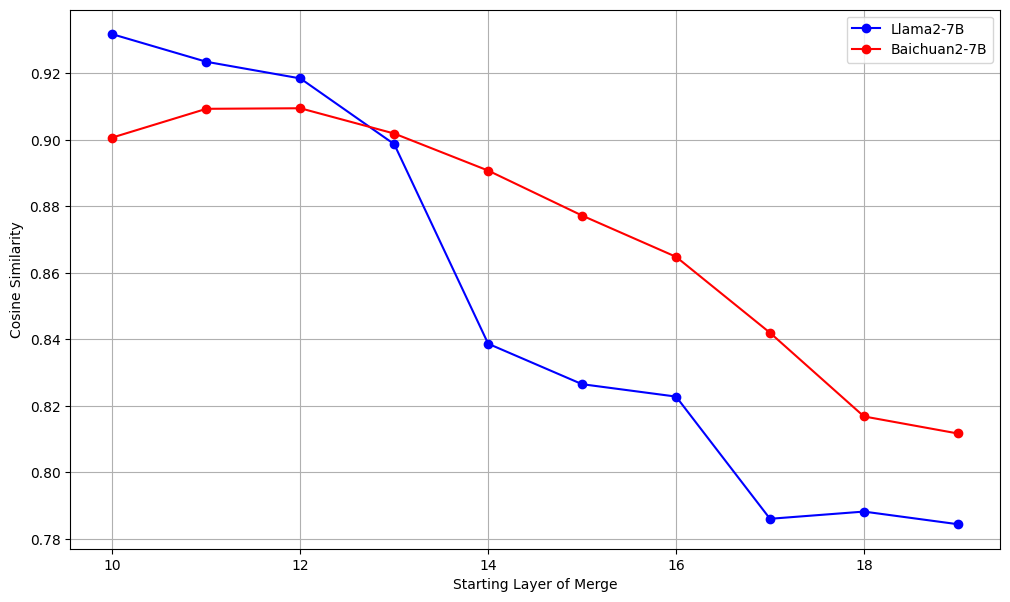

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import copy

def merge_four_layers(model, start_layer):
    merged_model = copy.deepcopy(model)
    base_layer = start_layer
    for i in range(1, 4):
        for name, param in merged_model.model.layers[base_layer].named_parameters():
            if name in merged_model.model.layers[base_layer + i].state_dict():
                param.data += merged_model.model.layers[base_layer + i].state_dict()[name] - param.data

    for _ in range(3):
        del merged_model.model.layers[base_layer + 1]

    return merged_model

def calculate_similarity_for_merge(original_model, merged_model, tokenizer, sents):
    return cal_last_hidden_sim(original_model, merged_model, tokenizer, sents)

def get_similarities_for_model(model, tokenizer, sents):
    start_layers = range(10, 20)
    similarities = []

    for start_layer in start_layers:
        if start_layer + 3 < len(model.model.layers):
            merged_model = merge_four_layers(model, start_layer)
            similarity = calculate_similarity_for_merge(model, merged_model, tokenizer, sents)
            similarities.append(similarity)

    return similarities

llama2_similarities = get_similarities_for_model(llama_model, llama_tokenizer, sampled_sentences)
baichuan2_similarities = get_similarities_for_model(baichuan_model, baichuan_tokenizer, sampled_sentences)

plt.figure(figsize=(12, 7))
start_layers = range(10, 10 + len(llama2_similarities))

plt.plot(start_layers, llama2_similarities, marker='o', label='Llama2-7B', color = 'b')
plt.plot(start_layers, baichuan2_similarities, marker='o', label='Baichuan2-7B', color = 'r')

plt.xlabel('Starting Layer of Merge')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True)
plt.show()

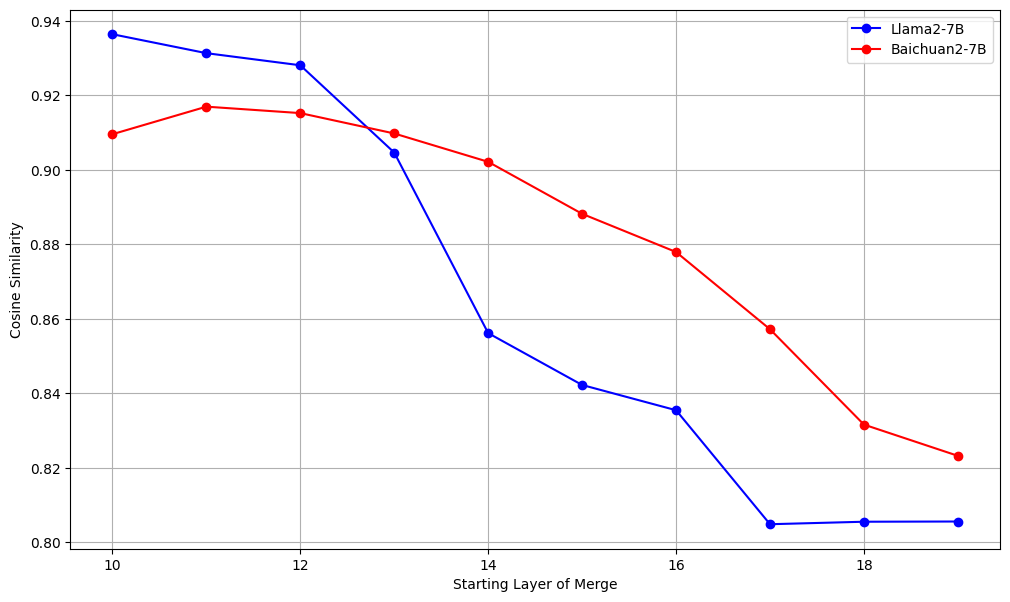

In [ ]:
plt.figure(figsize=(12, 7))
start_layers = range(10, 10 + len(llama2_similarities))

plt.plot(start_layers, llama2_similarities, marker='o', label='Llama2-7B', color = 'b')
plt.plot(start_layers, baichuan2_similarities, marker='o', label='Baichuan2-7B', color = 'r')

plt.xlabel('Starting Layer of Merge')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True)
plt.savefig('rdsc_7b.jpg', dpi = 300)
plt.show()